# Exploration of Deutsch’s Algorithm
***

## **Introduction**
### The Rise of Quantum Algorithms
In the rapidly evolving world of computer science, quantum algorithms have emerged as a groundbreaking frontier. These algorithms, unlike their classical counterparts, leverage the unique properties of quantum mechanics to solve certain problems more efficiently. Quantum computing holds the potential to revolutionize various sectors, from cryptography to material science, by tackling problems that are currently beyond the reach of classical computers.

### What is Deutsch’s Algorithm?
Deutsch’s Algorithm stands as one of the pioneering quantum algorithms, showcasing the power and promise of quantum computation. Proposed by David Deutsch in 1985, it was the first algorithm to demonstrate a clear quantum speedup over classical computation, albeit for a simple problem.

### The Problem Proposition
At its core, Deutsch’s Algorithm addresses a simple question about a binary function: Is the function balanced (i.e., produces both 0 and 1 outputs) or constant (always outputs 0 or always outputs 1)? While this may seem trivial at first glance, the quantum solution offers a peek into the immense power of quantum parallelism. Whereas a classical computer might need to evaluate the function multiple times to determine its nature, a quantum computer can deduce the answer in a single query—exemplifying the speedup quantum algorithms can achieve.

### Objective of this Project
Through this project, we aim to delve deep into the intricacies of Deutsch’s Algorithm. We'll embark on a journey starting with the algorithm's theoretical underpinnings, explore its practical implementation using the Qiskit framework, and verify its efficiency through simulation. By the end, the goal is to have a comprehensive understanding of the algorithm's significance, its workings, and its place in the broader landscape of quantum computing.



***
## **Mathematical Foundations**
### Quantum Bits (Qubits)
In classical computing, information is stored and processed in bits, which can take on values of either 0 or 1. Quantum computing, however, introduces a new computational unit: the **qubit**. Unlike classical bits, qubits can exist not just in a state corresponding to 0 or 1, but also in a superposition of these states. This means a qubit can represent both 0 and 1 simultaneously, a property that allows quantum computers to process a high number of possibilities concurrently.

Mathematically, a qubit's state can be represented as: $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle $ <br>
where $ |\alpha|^2 $  is the probability of the qubit being in state $|0\rangle$ and $ |\beta|^2 $  is the probability of the qubit being in state $|1\rangle$. The values of $\alpha$ and $\beta$  are complex numbers, and they must satisfy the normalization condition: $ |\alpha|^2 + |\beta|^2 = 1 $. It's only upon measurement that a qubit "chooses" one of its base states, based on the probabilities defined by

### Quantum Superposition
As touched upon earlier, **superposition** is the unique ability of qubits to exist in multiple states simultaneously. This doesn't mean the qubit is in a state of flux or indecision. Instead, it's in a precise state that's a combination of $|0\rangle$ and $|1\rangle$. It's only upon measurement that a qubit "chooses" one of its base states, based on the probabilities defined by $ |\alpha|^2 $ and $ |\beta|^2 $.



**Example:** Creating and Visualizing a Superposition State

Qiskit version: 0.45.0
Quantum Circuit:
   ┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘
Statevector: Statevector([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j],
            dims=(2,))


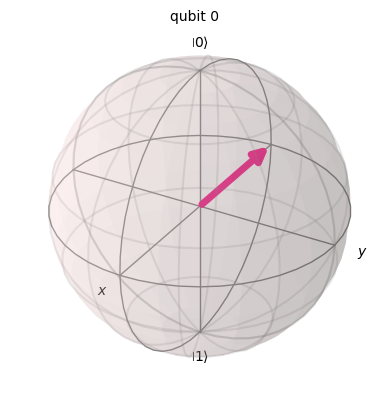

In [42]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# Print Qiskit version
print("Qiskit version:", qiskit.__version__)

# Create a new quantum circuit with one qubit
new_circuit = QuantumCircuit(1)

# Apply a Pauli-X gate followed by a Hadamard gate to the qubit
new_circuit.x(0)  # Flips the qubit to state |1>
new_circuit.h(0)  # Puts the qubit into a superposition

# Visualize the circuit
print("Quantum Circuit:")
print(new_circuit.draw())

# Use the statevector simulator to simulate the circuit
statevector_sim = Aer.get_backend('statevector_simulator')
statevector_result = execute(new_circuit, statevector_sim).result()

# Get the final statevector of the qubit
final_state = statevector_result.get_statevector()

# Print the statevector
print("Statevector:", final_state)

# Plot the qubit state on the Bloch sphere
plot_bloch_multivector(final_state)


A new quantum circuit with one qubit is created. A Pauli-X gate ('x(0)') is applied to flip the qubit to the state |1>. A Hadamard gate ('h(0)') is then applied to create a superposition. This combination results in a different superposition state compared to just applying 'h(0)'. The circuit is printed to show the applied gates. The circuit is simulated using the statevector simulator to get the final state of the qubit. The final state of the qubit is visualized on the Bloch sphere.

### Quantum Entanglement
Another quintessential quantum phenomenon is **entanglement**, a unique kind of correlation that can exist between qubits. When qubits become entangled, the state of one qubit immediately influences the state of the other, no matter the distance between them. This property has profound implications for quantum algorithms, allowing them to achieve feats classically thought impossible.

A simple example of entangled qubits can be represented by the Bell state: <br>
$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ <br>
In this entangled state, if one qubit is measured to be in state $|0\rangle$, the other qubit will also be found in state 
$|0\rangle$, and vice versa.

### Quantum Gates and Operations
Just as classical bits are manipulated using logical gates (AND, OR, NOT, etc.), qubits are manipulated using **quantum gates**. These gates perform linear unitary operations on qubits, transforming their states while preserving their normalization. Some basic quantum gates include the Pauli-X, Pauli-Y, Pauli-Z, and Hadamard gates. The Hadamard gate, in particular, plays a crucial role in Deutsch’s Algorithm by creating superposition states.

For instance, a Hadamard gate applied to a qubit in state $|0\rangle$ results in:<br>
$ H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $ <br>
This operation generates a qubit in a superposition state.

**Example:** Superposition and Measurement with Hadamard Gate

Quantum Circuit with Hadamard Gate and Measurement:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Qubit State on Bloch Sphere:
Measurement Outcomes:


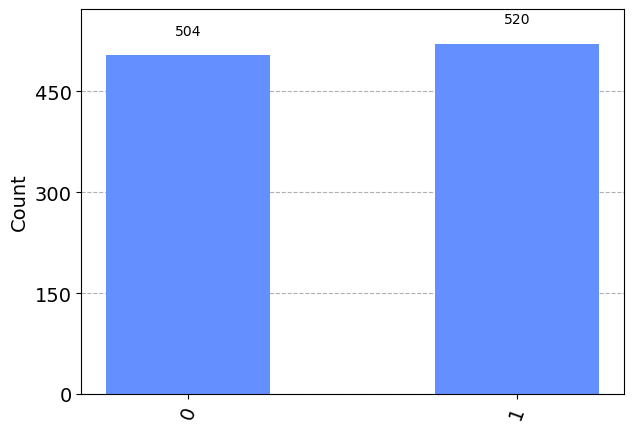

In [43]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with one qubit and one classical bit for measurement
circuit = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit
circuit.h(0)

# Measure the qubit
circuit.measure(0, 0)

# Visualize the circuit
print("Quantum Circuit with Hadamard Gate and Measurement:")
print(circuit.draw())

# Simulate the circuit using the statevector simulator to see the superposition
statevector_simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit.remove_final_measurements(inplace=False), statevector_simulator).result().get_statevector()

# Plot the qubit state on the Bloch sphere
print("Qubit State on Bloch Sphere:")
plot_bloch_multivector(statevector)

# Simulate the circuit using the QASM simulator to see the measurement outcomes
qasm_simulator = Aer.get_backend('qasm_simulator')
qasm_result = execute(circuit, qasm_simulator, shots=1024).result()

# Get the counts (measurement outcomes) and plot them
counts = qasm_result.get_counts()
print("Measurement Outcomes:")
plot_histogram(counts)


A quantum circuit with one qubit and one classical bit is created. The Hadamard gate is applied to the qubit, putting it into a superposition state. The qubit is measured, and the result is stored in the classical bit. The structure of the quantum circuit is displayed. The circuit (excluding the measurement) is simulated using the statevector simulator to visualize the qubit's state on the Bloch sphere. The state of the qubit is plotted on the Bloch sphere, showing the superposition. The entire circuit, including the measurement, is simulated using the QASM simulator to observe the probabilistic outcomes. The measurement results are plotted as a histogram, showing the distribution of 0 and 1 outcomes.

*** 
## **Deutsch’s Algorithm**

Deutsch's Algorithm occupies a pivotal position in the panorama of quantum computing. As one of the earliest quantum algorithms, it stands as both a testament to the potential of quantum computing and as a foundation upon which many subsequent quantum algorithms were built.

Historically, the introduction of Deutsch's Algorithm marked a paradigm shift. Formulated by the British physicist David Deutsch in 1985, this algorithm provided one of the first clear examples of how quantum computers could outperform classical computers under specific circumstances. While the problem it addresses—a determination of whether a given black-box function is balanced or constant—might seem deceptively simple, the quantum solution's elegance and efficiency were revelatory.

This quantum solution's inherent efficiency was not merely a slight improvement; it presented a scenario wherein a quantum computer could determine the nature of the function with just a single query, whereas a classical computer might require multiple queries. This quantum speedup, although demonstrated on a simplified problem, hinted at the broader potential of quantum computing.

Furthermore, the algorithm's mechanics introduced concepts fundamental to quantum computing, such as the use of quantum interference and the leveraging of qubits' ability to exist in a superposition of states.

The significance of Deutsch’s Algorithm transcends its specific utility. It served as a trailblazer, highlighting the realms of possibility awaiting exploration within quantum computing. The algorithm's introduction spurred further research, leading to more complex and versatile quantum algorithms. It became a cornerstone, a reference point, and an educational tool, driving enthusiasm and curiosity in both the academic and industrial sectors of the burgeoning field of quantum computing.

### Historical Context and Importance of Deutsch’s Algorithm

Deutsch’s Algorithm was introduced by British physicist David Deutsch in 1985. David Deutsch is often regarded as one of the founding figures of quantum computing, and his early work in the field laid down critical foundational principles that many later developments would build upon.

The introduction of this algorithm in the mid-1980s marked a watershed moment in computational theory. At its core, the algorithm was designed to determine if a given black-box function is constant or balanced. While this might seem like a relatively simple problem, what made Deutsch's approach revolutionary was his demonstration of a quantum solution's potential superiority over classical methods. Specifically, a quantum computer leveraging Deutsch's Algorithm could ascertain the nature of the function with just a single query, whereas a classical computer would require multiple queries to achieve the same result with certainty.

Deutsch’s Algorithm is recognized as one of the first quantum algorithms. This distinction is not merely chronological; the algorithm symbolizes the dawn of a new computational era. It provided one of the earliest instances of "quantum advantage," a term used to describe scenarios where quantum computers can outperform classical computers.

The significance of demonstrating this quantum advantage, even on such a specific and simplified problem, cannot be understated. It was a concrete example showing that quantum computers had the potential to process information in fundamentally new ways, offering efficiencies previously thought unreachable with classical computing paradigms.

In essence, while Deutsch’s Algorithm might address a niche problem, its broader implications reverberated through the scientific community. It served as a beacon, illustrating the promise of quantum computing and paving the way for subsequent research and developments in the field. It wasn't just about solving a specific problem more efficiently; it was a demonstration of a whole new computational frontier on the horizon.

###  Problem Statement

**Binary Functions:**

Binary functions, as the name suggests, deal with two discrete outputs. In the context of Deutsch’s Algorithm, we're specifically interested in functions that take a single binary input (0 or 1) and produce a binary output (0 or 1).

**Constant Functions:**

A function is termed "constant" if its output remains unchanged regardless of the input value. This means that for a binary function, it will always return either 0 or 1, irrespective of whether the input is 0 or 1.

*Examples:*

1. $ f(x) = 0 \quad \text{for all } x $
2. $ f(x) = 1 \quad \text{for all } x $


In both examples, it's clear that the output is independent of the input, hence they are constant functions.

**Balanced Functions:**

Conversely, a function is "balanced" if half of the possible inputs yield 0 and the other half yield 1. For binary functions dealing with single-bit inputs, this means the function returns 0 for one input and 1 for the other.

*Examples:*

1. $ f(0) = 0 $ and $ f(1) = 1 $
2. $ f(0) = 1 $ and $ f(1) = 0 $


In these examples, the function's output toggles based on the input, making them balanced functions.

**Classical Challenge:**

The central problem, which Deutsch’s Algorithm addresses, revolves around determining the nature of a given binary function (encased within a 'black-box' or oracle) – is it constant or balanced?

From a classical perspective, this task seems straightforward but isn't efficient. The reason is the uncertainty surrounding the black-box function's behavior. A classical computer would first query the oracle with one input (say 0) and note the output. If the output is 0, the function could still be either constant (with all outputs being 0) or balanced (with the output for input 1 being 1). To conclusively determine the nature of the function, the classical computer would then have to make a second query with the other input (1 in this case). Thus, it requires two queries to guarantee certainty.

In essence, while it might seem trivial, the classical approach doesn't provide an efficient solution, requiring multiple queries to solve the problem with certainty. Deutsch's Algorithm, on the other hand, presents a quantum solution that achieves the same with just one query, showcasing the power and potential of quantum algorithms.






### Introducing Deutsch’s Algorithm

**Unique Proposition:**

Deutsch’s Algorithm stands as a paradigm-shifting proposition in the landscape of quantum computing. What makes it so exceptional is its ability to ascertain the nature of a given black-box binary function with just a singular query. To put this in perspective, where classical computers would necessitate two queries to determine if the function is balanced or constant, Deutsch’s Algorithm, through the power of quantum mechanics, slashes this requirement by half.

This efficiency is more than a mere computational speedup. It embodies the spirit of quantum advantage, illustrating a task where quantum algorithms don't just perform better than classical counterparts but do so in a fundamentally distinct manner.

**Quantum Mechanics at Play:**

The magic behind Deutsch’s Algorithm largely stems from the foundational principles of quantum mechanics: superposition and interference.

1. **Superposition:** At the heart of the algorithm is the ability of qubits to exist in a superposition of states. When a qubit is in a superposition, it isn't just in one of its base states (0 or 1) but a probabilistic combination of both. This allows the quantum computer to process multiple possibilities simultaneously, setting the stage for the algorithm's unique querying capability.

2. **Interference:** Once the qubits are in superposition, the quantum gates manipulate these states such that they interfere with each other in a constructive or destructive manner. This interference pattern is the key to Deutsch's Algorithm. By cleverly designing the quantum circuit, the algorithm ensures that certain outcomes interfere destructively, canceling out and leaving behind only the information necessary to determine if the black-box function is balanced or constant.

By harnessing these quantum phenomena, Deutsch’s Algorithm can glean information about the function encapsulated within the oracle without overtly revealing its precise nature. It's a delicate dance of quantum states, resulting in an output that, when measured, instantly reveals the nature of the function with impeccable efficiency.

###  Step-by-Step Mechanics of the Algorithm

1. **Initialization:**

**Two Quibit System**The algorithm starts with two qubits. The first qubit, often referred to as the 'control qubit, is initialized to the state $|0\rangle$.The second qubit, known as the 'target qubit, is initialized to the state $|1\rangle$.This setup creates a baseline for the quantum operations that follow.

**Initial State Representation**  Mathematically, the combined initial state of this two-qubit system can be represented as: $$ |\psi_0\rangle = |0\rangle \otimes |1\rangle $$

2. **Application of Gates:**

**Hadamard Gates on Both Qubits:** To generate a superposition of states, Hadamard gates are applied to both qubits. The Hadamard gate,  takes a qubit from a definite state and places it into a state that is equally likely to collapse to either $|0\rangle$ or $|1\rangle$ upon measuremeant.

**Creating Superposition:** The application of the Hadamard gate transforms our qubits into a superposition of all four possible binary states. The resultant state of the system is a linear combination of $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$ This state can be represented as: $$ |\psi_1\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) $$ This results in a superposition of all possible combinations of the two qubits.


3. **Oracle Interaction:**

The oracle, or the 'black box', is a crucial component of the algorithm. It embodies the unknown binary function, either constant or balanced, that we aim to identify. The algorithm interacts with this oracle using the quantum principle of phase kickback.

When the two-qubit system (in superposition) is passed through the oracle, the oracle imparts a specific phase shift to the states based on the nature of the binary function. Without revealing the exact function, the oracle's interaction has the effect of marking the function's nature within the phase of the quantum states. The resulting state after this interaction can be represented as: $$ |\psi_2\rangle $$
It's crucial to note that the specific form of $ |\psi_2\rangle  $ will be contingent on the nature of the binary function within the oracle.

4. **Final Measurement:**

After the oracle interaction, another round of Hadamard gates is applied to transform the state of the qubits. The interference patterns that arise from this transformation process effectively translate the phase information (from the oracle interaction) into a measurable value.

When we measure the first qubit, the outcome reveals the nature of the binary function:

If the measurement results in $|0\rangle$, it indicates that the function is constant.
If the measurement results in $|1\rangle$, it signifies that the function is balanced.
Thus, with just one quantum query and subsequent measurement, the algorithm achieves what a classical approach would need two queries to confirm, demonstrating the efficiency and power of quantum computing.

### Key Takeaways and Efficiency

**Quantum Advantage:**

Deutsch's Algorithm exhibits a marked advantage over classical algorithms, primarily in the realm of query efficiency. In classical computing, determining whether a given black-box function (or oracle) is balanced or constant necessitates querying the oracle multiple times. Specifically, in a worst-case scenario, a classical algorithm might require two queries to ascertain the nature of the function.

In stark contrast, Deutsch's Algorithm, leveraging the principles of quantum mechanics, achieves the same goal with just a single query. This distinction may seem minimal given that we're only discussing one versus two queries. However, this reduction in queries illustrates a quantum advantage, setting the stage for more complex algorithms where quantum computing can offer exponentially fewer queries or steps than classical methods.

**Implications:**

The efficiency of Deutsch's Algorithm is not just about the reduced number of queries, but it's symbolic of a deeper underlying potential. This algorithm was one of the first to demonstrate that quantum computers could, in certain scenarios, outperform classical computers. While the real-world applications of Deutsch's Algorithm might be limited, its significance lies in its role as a harbinger of the promise of quantum computing.

The broader implication of this efficiency gain is profound. As quantum algorithms and technologies continue to develop, the domains in which quantum computers can surpass classical computers are expected to grow. Algorithms like Deutsch’s serve as foundational milestones, emphasizing the promise and potential quantum computing holds for tackling problems deemed computationally infeasible for classical machines.

The quantum advantage exhibited by Deutsch's Algorithm is a testament to the potential shift in computational paradigms, paving the way for more intricate quantum algorithms like Grover's and Shor's, which further the boundary of quantum computational supremacy.

***
## Implementation of Deutsch’s Algorithm Using Qiskit:

**Import Qiskit**

In [20]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit import __qiskit_version__

**Building the Quantum Circuit:**
 1. Initialize the Quantum Circuit:
 
Create a quantum circuit with 2 qubits and 1 classical bit:

In [21]:
qc = QuantumCircuit(2, 1)

2. Apply Initial Hadamard Gates:

Apply a Hadamard gate to the first qubit and prepare the second qubit in the $|1\rangle$ state:

In [22]:
qc.h(0)   # Hadamard gate on the first qubit
qc.x(1)   # Pauli-X gate to flip the second qubit to |1>
qc.h(1)   # Hadamard gate on the second qubit

**Designing the Oracle:**
1.Constant Oracle:

For a constant oracle, you can choose to do nothing (identity operation) or apply a global phase. For simplicity, we'll opt for the identity operation:

In [23]:
# Identity operation (doing nothing)
# qc.id(0)

2. Balanced Oracle:

For a balanced oracle, you can use a CNOT gate. The first qubit is the control, and the second is the target:

In [24]:
qc.cx(0, 1)  # CNOT gate with the first qubit as control and the second as target

**Completing the Circuit:**
1. Final Hadamard Gate and Measurement:

Apply another Hadamard gate to the first qubit and measure it:

In [25]:
qc.h(0)
qc.measure(0, 0)  # Measure the first qubit and store the result in the first classical bit

2. Visualize the Circuit:

(Optional) Display the circuit to verify its structure:

In [26]:
print(qc.draw())

     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


**Running the Circuit:**

1. Use Aer Simulator:

Set up the Aer simulator to run your quantum circuit:

In [27]:
simulator = Aer.get_backend('aer_simulator')

2. Execute the Circuit:

Run the circuit on the simulator:

In [28]:
job = execute(qc, simulator, shots=1024)
result = job.result()

3. View the Results:

Plot a histogram of the results to see the measurement outcomes:

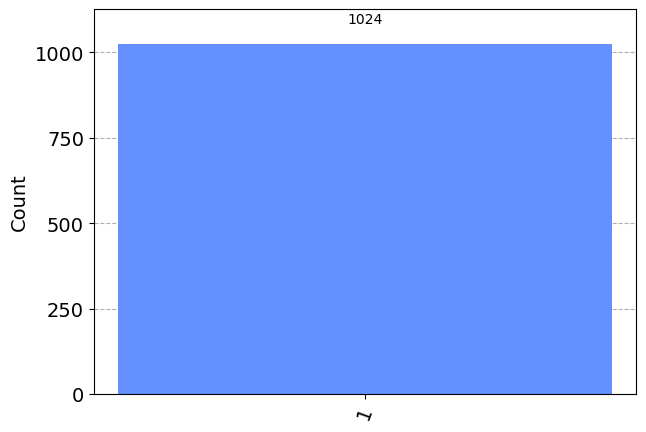

In [29]:
counts = result.get_counts(qc)
plot_histogram(counts)

###

**Interpreting the Results:**

If the measured result is predominantly $|0\rangle$, the function is constant.

If the result is predominantly $|1\rangle$, the function is balanced.

**Deutsch's Algorithm with a Modified Oracle**

In [44]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

**Step 2: Define the Oracles**

We'll define two oracles: one constant and one balanced.

**Constant Oracle**

This oracle does nothing (identity operation), representing a constant function.

In [45]:
def constant_oracle():
    qc = QuantumCircuit(2)
    # Identity operation - no change to qubits
    return qc

**Balanced Oracle**

This oracle performs an operation that creates a different output for different inputs, representing a balanced function.

In [46]:
def balanced_oracle():
    qc = QuantumCircuit(2)
    # Apply a Pauli-X gate to the second qubit, creating a balanced function
    qc.x(1)
    return qc

**Step 3: Implement Deutsch's Algorithm**


The algorithm uses a two-qubit system: one for input and one as an auxiliary qubit.

In [47]:
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)

    # Step 1: Prepare the qubits
    qc.x(1)  # Set the auxiliary qubit to |1>
    qc.barrier()

    # Step 2: Apply Hadamard gates to both qubits
    qc.h(0)
    qc.h(1)
    qc.barrier()

    # Step 3: Apply the oracle
    qc.append(oracle, [0, 1])
    qc.barrier()

    # Step 4: Apply Hadamard gate to the input qubit
    qc.h(0)
    qc.barrier()

    # Step 5: Measurement
    qc.measure(0, 0)
    return qc

**Step 4: Create and Test the Circuits**


Create and test both constant and balanced oracle circuits.

**Constant Oracle Circuit**

In [48]:
constant_circuit = deutsch_algorithm(constant_oracle())
print("Constant Oracle Circuit:")
print(constant_circuit)

Constant Oracle Circuit:
           ░ ┌───┐ ░ ┌──────────────┐ ░ ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─░─┤0             ├─░─┤ H ├─░─┤M├
     ┌───┐ ░ ├───┤ ░ │  circuit-233 │ ░ └───┘ ░ └╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤1             ├─░───────░──╫─
     └───┘ ░ └───┘ ░ └──────────────┘ ░       ░  ║ 
c: 1/════════════════════════════════════════════╩═
                                                 0 


**Balanced Oracle Circuit**

In [49]:
balanced_circuit = deutsch_algorithm(balanced_oracle())
print("Balanced Oracle Circuit:")
print(balanced_circuit)

Balanced Oracle Circuit:
           ░ ┌───┐ ░ ┌──────────────┐ ░ ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─░─┤0             ├─░─┤ H ├─░─┤M├
     ┌───┐ ░ ├───┤ ░ │  circuit-237 │ ░ └───┘ ░ └╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤1             ├─░───────░──╫─
     └───┘ ░ └───┘ ░ └──────────────┘ ░       ░  ║ 
c: 1/════════════════════════════════════════════╩═
                                                 0 


**Step 5: Simulate and Visualize the Results**

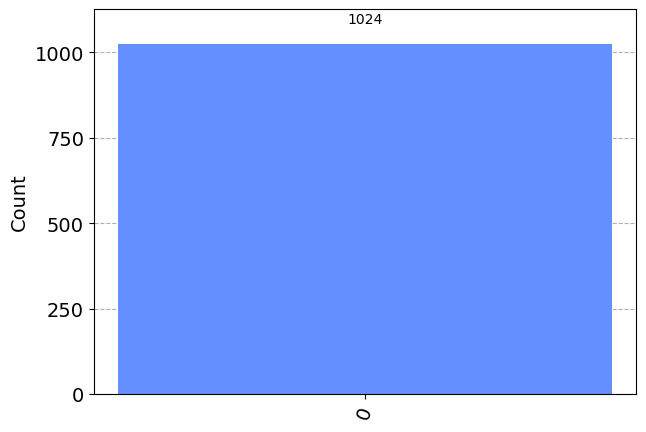

In [50]:
simulator = Aer.get_backend('qasm_simulator')

# Simulate the constant oracle circuit
results_constant = execute(constant_circuit, simulator).result()
counts_constant = results_constant.get_counts(constant_circuit)
plot_histogram(counts_constant)

# Simulate the balanced oracle circuit
results_balanced = execute(balanced_circuit, simulator).result()
counts_balanced = results_balanced.get_counts(balanced_circuit)
plot_histogram(counts_balanced)


**Explanation of Results**

- **Constant Oracle:** If the function is constant, the measurement result will be 0.

- **Balanced Oracle:** If the function is balanced, the measurement result will be 1.

*** 
## Executing a Quantum Circuit on a Real Quantum Device

**Step 1: Import Necessary Libraries**

Import the required modules from Qiskit:

In [30]:
from qiskit import IBMQ, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

**Step 2: Load Your IBM Q Account** 

Load your IBM Q account. You'll need an API token from IBM Quantum Experience.

In [31]:
IBMQ.save_account('2cec5b885f38f54ffe28729c455c77a86a825bc28e6976e063f859f9601da6f02d7b9cd0d99f0641d548a2b1e05d4554113764721e813daeeaa997ec15f34006', overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-12-21 11:08:23,007: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

**Step 3: Create a Quantum Circuit**

Let's create a simple quantum circuit as an example. Here, we'll create a Bell state.

In [32]:
# Create a Quantum Circuit with 2 qubits
circuit = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
circuit.h(0)

# Apply a CNOT gate; control qubit is 0 and target qubit is 1
circuit.cx(0, 1)

# Measure the qubits
circuit.measure([0,1], [0,1])

# Draw the circuit
print(circuit.draw())

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


**Step 4: Choose a Real Quantum Device**

Select the least busy quantum device available.

In [33]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                           not x.configuration().simulator and x.status().operational==True)
backend = sorted(backend, key=lambda b: b.status().pending_jobs)[0]
print("We'll use the least busy device:", backend.name())

We'll use the least busy device: ibm_osaka


**Step 5: Execute the Circuit on the Quantum Device**

Run your quantum circuit on the selected real quantum device.

In [34]:
job = execute(circuit, backend=backend, shots=1024)
result = job.result()

**Step 6: Visualize the Results**

Plot a histogram of the results

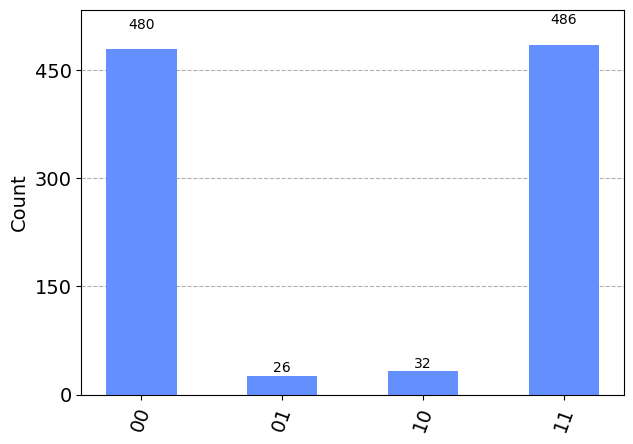

In [ ]:
counts = result.get_counts(circuit)
plot_histogram(counts)

**Second Example**

Here is a more complex example by implementing the Deutsch-Jozsa algorithm and executing it on a real quantum device. The Deutsch-Jozsa algorithm is designed to determine whether a given function is constant or balanced. In this example, we'll create a quantum circuit for the Deutsch-Jozsa algorithm and run it on an IBM Quantum device.

In [35]:
from qiskit import IBMQ, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [36]:
IBMQ.save_account('2cec5b885f38f54ffe28729c455c77a86a825bc28e6976e063f859f9601da6f02d7b9cd0d99f0641d548a2b1e05d4554113764721e813daeeaa997ec15f34006', overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-12-21 11:28:16,592: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

**Create the Deutsch-Jozsa Circuit**

We'll create a circuit for a 3-qubit function, where the first two qubits are input qubits, and the third qubit is an auxiliary qubit.

In [37]:
# Number of qubits for the function (excluding the auxiliary qubit)
n = 2

# Create a Quantum Circuit with n+1 qubits (n input qubits and 1 auxiliary qubit)
circuit = QuantumCircuit(n+1, n)

# Apply Hadamard gates to the input qubits
for qubit in range(n):
    circuit.h(qubit)

# Prepare the auxiliary qubit in the |1> state and apply a Hadamard gate
circuit.x(n)
circuit.h(n)

# Add a barrier for clarity
circuit.barrier()

# Define the oracle for a balanced function (e.g., CNOT gates)
# This is where you define your function - this is just an example
for qubit in range(n):
    circuit.cx(qubit, n)

# Add another barrier
circuit.barrier()

# Apply Hadamard gates to the input qubits again
for qubit in range(n):
    circuit.h(qubit)

# Measure the input qubits
circuit.measure(range(n), range(n))

# Draw the circuit
print(circuit.draw())

     ┌───┐      ░            ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├───
     ├───┤      ░   │        ░ ├───┤└╥┘┌─┐
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/════════════════════════════════╩══╩═
                                     0  1 


In [38]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.backends(filters=lambda x: x.configuration().n_qubits >= n+1 and 
                           not x.configuration().simulator and x.status().operational==True)
backend = sorted(backend, key=lambda b: b.status().pending_jobs)[0]
print("Using the least busy device:", backend.name())

Using the least busy device: ibm_osaka


In [39]:
job = execute(circuit, backend=backend, shots=1024)
result = job.result()

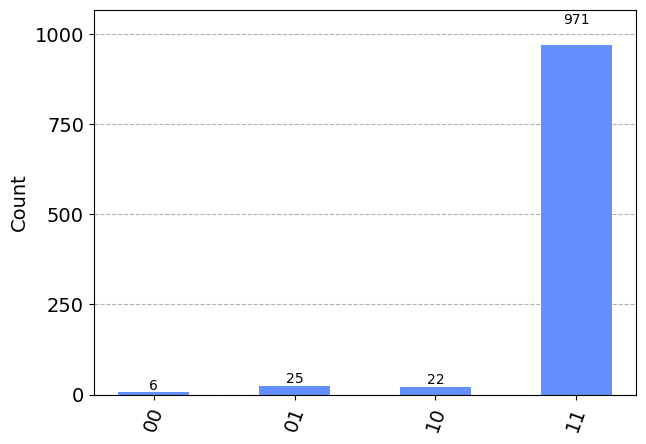

In [40]:
counts = result.get_counts(circuit)
plot_histogram(counts)

**Interpret the Results**

- If the function is **constant,** all measured qubits will collapse to 0.
- If the function is **balanced,** you will see a mixture of 0 and 1 in the measurement results.

***
## Complexity and Significance

### Theoretical Framework

**Computational Models**

- **Classical Computing Model:**
In classical computing, data is processed using bits, which are binary and can be in one of two states: 0 or 1. These bits are the fundamental units of information.
The operations on these bits are governed by Boolean logic, which is a form of algebra where all values are either true or false, corresponding to binary 1 or 0.
Classical computers use a series of logical operations (like AND, OR, NOT) to perform computations, and these operations are deterministic, meaning the same input will always produce the same output.

- **Quantum Computing Model:**
Quantum computing, on the other hand, is based on qubits. Unlike classical bits, qubits can exist in a state of superposition, where they are both 0 and 1 simultaneously, until measured.
Quantum logic includes operations (quantum gates) that are non-Boolean and can create entanglement between qubits, linking their states in a way that cannot be described independently of each other.
Computations in a quantum computer can involve complex transformations represented by unitary matrices. The outcome of these operations can be probabilistic because of the superposition and entanglement of qubits.

**Deterministic vs. Probabilistic**

- **Deterministic Nature of Classical Computation:**
Classical algorithms are deterministic. For a given input and a defined set of operations (algorithm), the output will always be the same. This predictability shapes the design of algorithms and the expectation of outcomes in classical computing.
Complexity in classical computing is often evaluated based on the time it takes to complete a task (time complexity) and the space or memory required (space complexity).

- **Probabilistic Nature of Quantum Computation:**
Quantum computation introduces inherent probabilistic characteristics. When a qubit in superposition is measured, it probabilistically collapses to one of its basis states, with the probability defined by its quantum state before measurement.
The probabilistic nature of quantum algorithms implies that they can provide the correct answer with a certain probability. Therefore, quantum algorithms are often designed to amplify the probability of the correct answer and reduce the probability of incorrect answers, using techniques like amplitude amplification.
The probabilistic outcomes affect the complexity analysis of quantum algorithms. Quantum complexity measures include considerations of how likely an algorithm is to provide the correct answer within a certain time frame (bounded-error quantum polynomial time, or BQP).


### Complexity Classes

**P vs NP**

- **Introduction to Complexity Classes:**
Complexity classes are categories in computational theory that are used to describe the resource requirements (like time and space) of algorithms in relation to the size of the input.
The class P (Polynomial time) represents problems that can be solved quickly (in polynomial time) by a deterministic Turing machine, which is a theoretical model for classical computers.
The class NP (Nondeterministic Polynomial time) includes problems for which a solution can be verified quickly (also in polynomial time) by a deterministic Turing machine, but it is not known whether these solutions can be found quickly.

- **Relevance to Deutsch’s Algorithm:**
Problems solvable by Deutsch’s Algorithm are in the class P since the algorithm provides a solution in a deterministic manner and requires only a polynomial number of steps relative to the size of the input (which, in the simplest case, is a single bit).
While Deutsch's problem is not directly an NP problem, the significance of Deutsch’s Algorithm in the context of P vs. NP lies in its demonstration of quantum advantage and the potential to solve certain problems more efficiently than classical algorithms.

**Quantum Complexity Class (BQP):**

- **Defining BQP:**
BQP, or Bounded-error Quantum Polynomial time, is a class of decision problems solvable by a quantum computer in polynomial time, with an error probability of less than 1/3 for all instances.
An error probability of less than 1/3 is chosen because it allows for error correction through repetition; by running the algorithm multiple times, we can boost the confidence in the result to near certainty

- **Deutsch’s Algorithm and BQP:**
Deutsch’s Algorithm falls into the BQP class because it gives the correct answer with a probability greater than 2/3 (in fact, it gives the correct answer with certainty if the quantum computer is ideal and there are no errors in the computation).
The algorithm is one of the simplest examples of a quantum algorithm that provides a solution in polynomial time with bounded error, making it an excellent representative for introducing the BQP complexity class.

***

## References

### Research Papers
- Lu, X. (2022). Research on Biological Population Evolutionary Algorithm and Individual Adaptive Method Based on Quantum Computing. [DOI](https://doi.org/10.1155/2022/5188335)
- Osaba, E., et al. (2021). Focusing on the hybrid quantum computing - Tabu search algorithm: new results on the Asymmetric Salesman Problem. [DOI](https://doi.org/10.1145/3449726.3463123)
- Chen Lin, Shang-Wei Lin, Yean-Ru Chen (2022). Dynamic assertion for quantum circuits based on stabilizers. [DOI](https://dx.doi.org/10.1117/12.2632655)
- Vishal P. Patil, vZiga Kos, J. Dunkel (2022). Harmonic flow field representations of quantum bits and gates. [arXiv](https://arxiv.org/abs/2202.03941)
- Mahankali Mani Teja, J. Ravindra, Sunku Rohan Sanjay Reddy, Irugurala Yashwanth (2023). Quantum Modular Multiplication: A New Frontier in Quantum Computing. [DOI](https://dx.doi.org/10.1109/I2CT57861.2023.10126376)
- J. Avron, Ofer Casper, Ilan Rozen (2021). Quantum advantage and noise reduction in distributed quantum computing. [DOI](https://dx.doi.org/10.1103/PhysRevA.104.052404) | [arXiv](https://arxiv.org/pdf/2104.07817)
- Rodney Franco (2021). Deutsch-Jozsa Algorithm: a look at the power of quantum computing. [DOI](https://dx.doi.org/10.18004/rcfacen.2021.12.2.83) | [PDF](http://scielo.iics.una.py/pdf/rcfacen/v12n2/2222-145X-rcfacen-12-02-83.pdf) (Translate)
- Cristian S. Calude, M. Dinneen, K. Svozil (2000). Reflections on quantum computing. [DOI](https://dx.doi.org/10.1002/1099-0526(200009/10)6:1%3C35::AID-CPLX1005%3E3.0.CO;2-T) | [PDF](http://www.cs.auckland.ac.nz/CDMTCS//researchreports/130cris.pdf)


### Quantum Computing Basics
- Quantum 101: [Quantum Zeitgeist](https://quantumzeitgeist.com/quantum-computing-101/)
- What is Quantum Computing? | [IBM](https://www.ibm.com/topics/quantum-computing)
- Quantum Computing vs Classical Computing: [DevTechnosys](https://devtechnosys.com/insights/tech-comparison/quantum-computing-vs-classical-computing/#:~:text=The%20classical%20bit%20is%20the%20basic%20unit%20in,of%20a%20given%20input%20is%20always%20the%20same.)

### Deutsch-Jozsa Algorithm
- Wikipedia: [Deutsch–Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)
- Deutsch-Jozsa, or How to Evaluate a Balanced Function: [Full Stack Quantum Computation](https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/)
- Code example: Deutsch-Jozsa algorithm | [Quantum Inspire](https://www.quantum-inspire.com/kbase/deutsch-jozsa-algorithm/)

### Quantum Gates
- Hadamard Gate: [ScienceDirect](https://www.sciencedirect.com/topics/mathematics/hadamard-gate)
- CNOT Gate: [Quantum Inspire](https://www.quantum-inspire.com/kbase/cnot/)

### Quantum Information and Qubits
- Basics of Quantum Information: [IBM Quantum](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#quantum-information)
- What is a qubit? [Quantum Inspire](https://www.quantum-inspire.com/kbase/what-is-a-qubit/)
- Understanding the Theory and Math Behind Qubits: [Medium](https://medium.com/the-research-nest/understanding-the-theory-and-math-behind-qubits-2bf86a56441c)

### Additional Quantum Computing Resources
- Quantum Computing - The Deutsch-Jozsa algorithm | [Linkedin](https://www.linkedin.com/pulse/quantum-computing-deutsch-jozsa-algorithm-arun-serr%C3%A3o/)
- Quantum Computing: Definition, How It's Used, and Example | [Investopedia](https://www.investopedia.com/terms/q/quantum-computing.asp)
- Quantum Computing Is Coming. What Can It Do? | [Harvard Business Review](https://hbr.org/2021/07/quantum-computing-is-coming-what-can-it-do)

### Quantum Computing Frameworks and Tools
- Qiskit - An open-source framework for quantum computing. (2021). [Qiskit](https://qiskit.org/)
- IBM Quantum Experience. (2021) [IBM Quantum](https://quantum-computing.ibm.com/docs/)
- GitHub Repository: [Ian McLoughlin's Quantum Computing](https://github.com/ianmcloughlin/quantum-computing)
- GitHub Repository: [Ian Mcloughlin's Quantum Notebooks](https://github.com/ianmcloughlin/quantum-notebooks)
- GitHub Repository: [Qiskit Textbook](https://github.com/Qiskit/textbook/tree/main/notebooks)

### Quantum Computing in Research
- Quantum Computing in the NISQ era and beyond. Preskill, J. (2018). [Quantum, 2, 79](https://doi.org/10.22331/q-2018-08-06-79)
- Applications of Quantum Algorithms: [Nature](https://www.nature.com/articles/npjqi201523#:~:text=Areas%20in%20which%20quantum%20algorithms,large%20systems%20of%20linear%20equations)
